<a href="https://colab.research.google.com/github/rishabhk1501/Data-Analytics-Tasks/blob/main/session_16_tasks_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [3]:
# code here

emp = pd.Series([])
emp

Series([], dtype: object)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [9]:
# code here

s1 = pd.Series([1,4,7,2,43,12])
s2 = pd.Series([11,34,54,21,4,2])



In [10]:
s1 + s2

0    12
1    38
2    61
3    23
4    47
5    14
dtype: int64

In [13]:
s1 - s2

0   -10
1   -30
2   -47
3   -19
4    39
5    10
dtype: int64

In [11]:
s1 * s2

0     11
1    136
2    378
3     42
4    172
5     24
dtype: int64

In [12]:
s1 / s2

0     0.090909
1     0.117647
2     0.129630
3     0.095238
4    10.750000
5     6.000000
dtype: float64

###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [14]:
# code here

s1 = pd.Series([2, 4, 6, 8, 10])
s2 = pd.Series([1, 3, 5, 7, 10])

In [15]:
s1 == s2

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [16]:
s1 > s2

0     True
1     True
2     True
3     True
4    False
dtype: bool

###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [3]:
# code here

series = pd.Series([1,2,'Python', 2.0, True, 100, {'a':1,'b':2,'c':3}])

pd.to_numeric(series,errors='coerce')

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
6      NaN
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [35]:
ipl_runs = pd.read_csv('/content/batsman_runs_ipl.csv')
ipl_runs.head()

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


In [36]:
#set_index
if ipl_runs['batter'].is_unique:
  ipl_runs.set_index('batter',inplace=True)
else:
  print('Index values are not unique')

In [40]:
# convert dataframe to series

runs_series = ipl_runs.squeeze()
runs_series.head()

batter
A Ashish Reddy    280
A Badoni          161
A Chandila          4
A Chopra           53
A Choudhary        25
Name: batsman_run, dtype: int64

In [43]:
# code here

runs_series.sort_values(ascending=False).head(10)

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64

###`Q-7` No of players having runs above 3000

In [47]:
# code here

len(runs_series[runs_series > 3000])

20

###`Q-8` No of players having runs above mean value?

In [50]:
# code here

len(runs_series[runs_series > runs_series.mean()])

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



In [19]:
import numpy as np
import pandas as pd
items = pd.read_csv('/content/items.csv')

In [20]:
items.shape

(4622, 2)

In [21]:
items.head()

,item_name,item_price
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39
4,Chicken Bowl,$16.98


In [22]:
items.set_index('item_name',inplace=True)


In [23]:
items_series = items.squeeze()

In [24]:
items_series.head()

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
Name: item_price, dtype: object

In [38]:
items_series.isnull().sum()

0

In [33]:
round(items_series[~(items_series.isnull())].apply(lambda x: float(x[1:].strip())).mean(),2)

7.46

In [37]:
items_series.fillna('$7.46 ',inplace=True)

In [39]:
def usd_to_inr(string):
  return round((float(string[1:].strip()) * 80),2)

In [18]:
items_series.apply(lambda x: round(float(x[1:].strip()),2))

TypeError: 'int' object is not subscriptable

In [19]:
print(items_series.unique())

['$2.39 ' '$3.39 ' '$16.98 ' '$10.98 ' nan '$11.75 ' '$9.25 ' '$4.45 '
 '$8.75 ' '$11.25 ' '$8.49 ' '$2.18 ' '$8.99 ' '$1.09 ' '$1.69 ' '$2.95 '
 '$3.99 ' '$2.15 ' '$22.50 ' '$11.48 ' '$17.98 ' '$17.50 ' '$4.30 '
 '$5.90 ' '$1.25 ' '$6.49 ' '$11.08 ' '$1.50 ' '$22.16 ' '$32.94 '
 '$22.20 ' '$10.58 ' '$2.50 ' '$23.50 ' '$7.40 ' '$18.50 ' '$3.00 '
 '$6.78 ' '$11.89 ' '$9.39 ' '$23.78 ' '$4.00 ' '$3.75 ' '$8.69 ' '$2.29 '
 '$8.90 ' '$3.27 ' '$3.89 ' '$8.19 ' '$35.00 ' '$27.75 ' '$11.80 '
 '$6.00 ' '$26.25 ' '$21.96 ' '$4.36 ' '$7.50 ' '$4.78 ' '$13.35 '
 '$6.45 ' '$5.07 ' '$22.96 ' '$7.17 ' '$7.98 ' '$4.50 ' '$26.07 '
 '$12.98 ' '$35.25 ' '$44.25 ' '$10.50 ' '$33.75 ' '$16.38 ' '$13.52 '
 '$5.00 ' '$15.00 ' '$8.50 ' '$17.80 ' '$1.99 ' '$11.49 ']


In [12]:
usd_to_inr(items_series[0])

191.2

###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [40]:
# code here

inr = items_series.apply(usd_to_inr)
inr

item_name
Chips and Fresh Tomato Salsa              191.2
Izze                                      271.2
Nantucket Nectar                          271.2
Chips and Tomatillo-Green Chili Salsa     191.2
Chicken Bowl                             1358.4
                                          ...  
Steak Burrito                             940.0
Steak Burrito                             940.0
Chicken Salad Bowl                        900.0
Chicken Salad Bowl                        700.0
Chicken Salad Bowl                        700.0
Name: item_price, Length: 4622, dtype: float64

###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [44]:
# code here

inr.mean()

597.0398961488532

In [52]:
inr.quantile(1)

3540.0

In [48]:
inr.describe()

count    4622.000000
mean      597.039896
std       336.927321
min        87.200000
25%       311.200000
50%       700.000000
75%       740.000000
max      3540.000000
Name: item_price, dtype: float64

In [74]:
# total bins
int((inr.max()-inr.min())/50)+1

70

<Axes: ylabel='Frequency'>

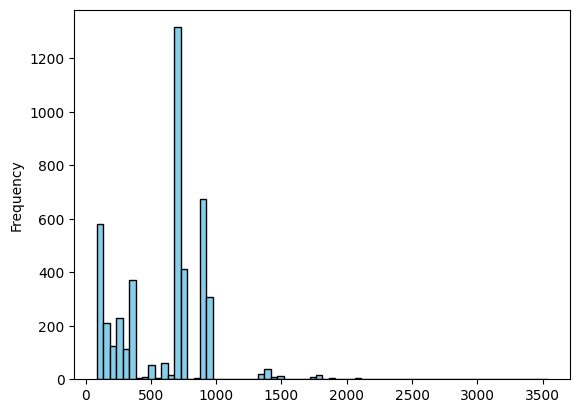

In [65]:
inr.plot.hist(bins=70,color='skyblue', edgecolor='black')

In [76]:
inr[inr.between(1000,2000)].count()

116